In [ ]:
!unzip '/content/drive/MyDrive/Data_Set/Data.zip'

In [2]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline
from keras import models
from keras import layers
import keras.preprocessing  as kp
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers

# **Exploratory Data Analysis**

***Preparing the ImageDataGenerator with minor data augmentations to keep the training time optimal.***

In [3]:
train_datagen = ImageDataGenerator( # Data Augumentation for test data
rescale=1./255,
rotation_range=30,
shear_range=0.3,
zoom_range=0.3
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_gen=train_datagen.flow_from_directory('/content/Training',
                                            target_size=(250,250),
                                            batch_size=48,
                                            class_mode='binary')

Found 47009 images belonging to 2 classes.


In [5]:
valid_gen=test_datagen.flow_from_directory('/content/Validation',
                                           target_size=(250,250),
                                           batch_size=48,
                                           class_mode='binary')

Found 11649 images belonging to 2 classes.


In [6]:
kernel_s=(3,3)

# **Building the Model**

In [7]:
model=models.Sequential()
model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(250,250,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 64)       0

In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

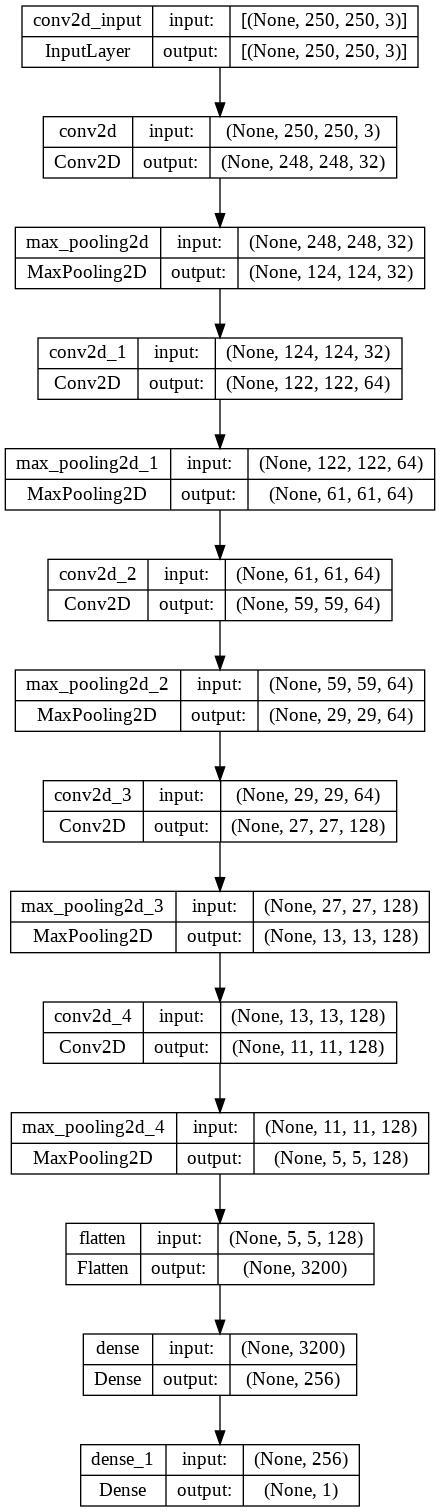

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

# **Training the Model**

In [10]:
history=model.fit(train_gen,steps_per_epoch=70,epochs=50,
                  validation_data=valid_gen,validation_steps=50)

Epoch 1/50
70/70 [==============================] - 64s 777ms/step - loss: 0.7121 - acc: 0.5077 - val_loss: 0.6951 - val_acc: 0.5104
Epoch 2/50
70/70 [==============================] - 52s 743ms/step - loss: 0.6959 - acc: 0.5646 - val_loss: 0.6662 - val_acc: 0.5562
Epoch 3/50
70/70 [==============================] - 51s 729ms/step - loss: 0.6528 - acc: 0.6595 - val_loss: 0.5079 - val_acc: 0.7821
Epoch 4/50
70/70 [==============================] - 53s 757ms/step - loss: 0.5401 - acc: 0.7443 - val_loss: 0.6663 - val_acc: 0.6575
Epoch 5/50
70/70 [==============================] - 52s 736ms/step - loss: 0.5021 - acc: 0.7624 - val_loss: 0.4225 - val_acc: 0.8388
Epoch 6/50
70/70 [==============================] - 51s 731ms/step - loss: 0.4586 - acc: 0.7982 - val_loss: 0.3705 - val_acc: 0.8633
Epoch 7/50
70/70 [==============================] - 54s 766ms/step - loss: 0.4290 - acc: 0.8176 - val_loss: 0.3682 - val_acc: 0.8354
Epoch 8/50
70/70 [==============================] - 51s 729ms/step - 

# **Plotting the training vs validation loss and accuracy graphs**

<Figure size 432x288 with 0 Axes>

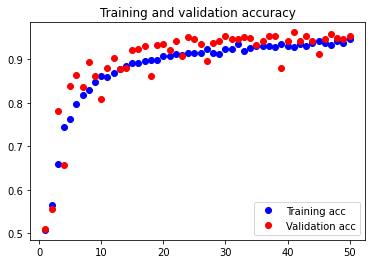

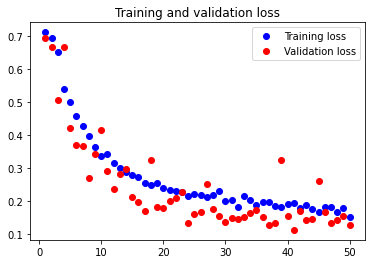

<Figure size 432x288 with 0 Axes>

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

# **Model Testing**

In [12]:
test_datagen1 = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen1.flow_from_directory('/content/Validation',
                                                    target_size=(250,250),
                                                    batch_size=32,
                                                    class_mode='binary')

Found 11649 images belonging to 2 classes.


In [13]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)
print('test acc:', test_acc)
print('test_loss:',test_loss)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


test acc: 0.95703125
test_loss: 0.12229636311531067


# **Thus, we have got an accuracy of ~95.70%**

1/1 [==============================] - 0s 214ms/step
[0.]
This  is a female


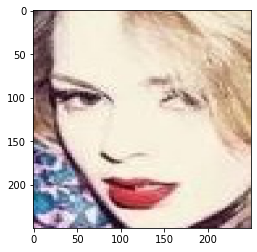

In [14]:
import tensorflow as tf
from keras.preprocessing import image

#  image test 1

target_size = (250, 250)
path_testmodel = "/content/Validation/female/114295.jpg.jpg"
imge = tf.keras.utils.load_img(path_testmodel, target_size=target_size)
X = tf.keras.utils.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)

1/1 [==============================] - 0s 19ms/step
[0.]
This  is a female


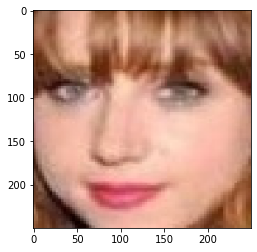

In [15]:
#  image test 2

path_testmodel = "/content/Validation/female/114298.jpg.jpg"
imge = tf.keras.utils.load_img(path_testmodel, target_size=target_size)
X = tf.keras.utils.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("This is a male")
else:
    print( "This  is a female")
plt.imshow(imge)

1/1 [==============================] - 0s 19ms/step
[1.]
This is a male


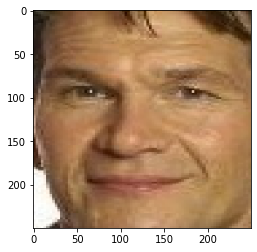

In [16]:
#  image test 3

path_testmodel = "/content/Validation/male/066521.jpg.jpg"
imge = tf.keras.utils.load_img(path_testmodel, target_size=target_size)
X = tf.keras.utils.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("This is a male")
else:
    print( "This is a female")
plt.imshow(imge)

1/1 [==============================] - 0s 16ms/step
[1.]
This is a male


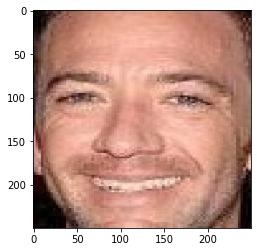

In [17]:
#  image test 4

path_testmodel = "/content/Validation/male/066525.jpg.jpg"
imge = tf.keras.utils.load_img(path_testmodel, target_size=target_size)
X = tf.keras.utils.img_to_array(imge)
X = np.expand_dims(X, axis=0)

images = np.vstack([X])
classes = model.predict(images, batch_size=1)
print(classes[0])
if classes[0]>0.5:
    print("This is a male")
else:
    print( "This is a female")
plt.imshow(imge)